In [2]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np


filepath = "C:\\Users\\HP\\Desktop\\Özgem\\Koç\\Fall 2020\\MAVA 354\\202005171549_corona_tweets.csv"
covid=pd.read_csv(filepath)
pd.options.display.max_colwidth = 500
covid = covid.drop(['id_str', 'user_id'],1) #This operation is held for hosting the code on Github.
covid

,Unnamed: 0,Unnamed: 0.1,coordinates,country,created_at,device,entity_hashtags,entity_mentions,entity_type,entity_urls,in_reply_to_user_id,is_retweet,screen_name,text,tweet_location,user_followers,user_following,user_location
0,34646,34646,NaN,NaN,2020-03-03 02:49:50,Twitter for iPhone,[],[],NaN,['twitter.com/i/web/status/1…'],NaN,False,Manny_Alicandro,"Every 3 days? Coronavirus in NY? Workers will disinfect parts of subways, buses every 72 hours as New York reports… https://t.co/sxVkmdTeME",NaN,9125,4872,NY
1,34647,34647,NaN,NaN,2020-03-03 02:49:50,Twitter for Android,[],['shobey_edits'],NaN,[],NaN,True,wodzd,"RT @shobey_edits: sent a mail to marvel ent, regarding dogyul and dongpyo's fm asking about any update in-line with covid-19 and finally go…",NaN,3123,3103,𝐗𝐎𝐧𝐞𝐈𝐭
2,34648,34648,NaN,NaN,2020-03-03 02:49:50,Twitter for iPhone,[],['realDonaldTrump'],NaN,['twitter.com/i/web/status/1…'],25073877.0,False,mom2speak1,"@realDonaldTrump Wow, a nice incubator for COVID-19! But hey, what do epidemiologists know, right Donny? Make Ameri… https://t.co/FCk8mUHmKe",NaN,313,1149,United States
3,34649,34649,NaN,NaN,2020-03-03 02:49:50,Twitter Web App,[],['uk_domain_names'],NaN,[],NaN,True,lazaroumterror,"RT @uk_domain_names: ""UK and Scottish government modelling shows that the economic and fiscal costs of a Covid-19 epidemic could be on a pa…",NaN,3871,3935,London
4,34650,34650,NaN,NaN,2020-03-03 02:49:50,Twitter Web App,[],['LanceHoward70'],NaN,[],NaN,True,astro_stephen13,"RT @LanceHoward70: This 👇 is the leader of the free world, folks. A man who does not understand that the “flu shot” will not work as a vacc…",NaN,538,367,"Georgia, USA"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541788,1048570,1050544,NaN,NaN,2020-02-29 17:56:27,Twitter for Android,['COVID19'],['Laurie_Garrett'],NaN,[],NaN,True,Who_IsM,"RT @Laurie_Garrett: If the US govt keeps billing Americans $1000s for evacuations and #COVID19 quarantine, people who are infected will hid…",NaN,1937,4996,Earth
541789,1048571,1050545,NaN,NaN,2020-02-29 17:56:27,Twitter for iPhone,['coronavirus'],['tancredipalmeri'],NaN,[],NaN,True,orionmaggi,RT @tancredipalmeri: The #coronavirus cases in Italy: (accumulative count) Day1: 14cases/1dead Day2: 76/2 Day3: 153/3 Day4: 231/7 Day5: 37…,NaN,162,587,New England
541790,1048572,1050546,NaN,NaN,2020-02-29 17:56:25,Twitter for iPhone,[],['treasonstickers'],NaN,[],NaN,True,Peace_NH,"RT @treasonstickers: FUN FACT: Donald Trump is the first President in US history to get impeached, botch a pandemic quarantine and cause a…",NaN,594,434,New Hampshire
541791,1048573,1050547,NaN,NaN,2020-02-29 17:56:25,Twitter for iPhone,[],['washingtonpost'],NaN,[],NaN,True,avoidchaos,"RT @washingtonpost: DHS employee told to report to work in Newark after China travel, in violation of coronavirus quarantine, complaints sa…",NaN,766,518,"Los Angeles, CA"


#### Question 1

How many lines are there in the dataframe? How much space does it consume in your memory? 

In [3]:
print("There are", len(covid), "lines in the the dataframe.")
print()
print("The space that covid dataframe consumes in my memory for each column is as such:")
print(covid.memory_usage())
print()
print("In total, it consumes", covid.memory_usage(index=True).sum(), "bytes space in my memory.")

There are 541793 lines in the the dataframe.

The space that covid dataframe consumes in my memory for each column is as such:
Index                      128
Unnamed: 0             4334344
Unnamed: 0.1           4334344
coordinates            4334344
country                4334344
created_at             4334344
device                 4334344
entity_hashtags        4334344
entity_mentions        4334344
entity_type            4334344
entity_urls            4334344
in_reply_to_user_id    4334344
is_retweet              541793
screen_name            4334344
text                   4334344
tweet_location         4334344
user_followers         4334344
user_following         4334344
user_location          4334344
dtype: int64

In total, it consumes 74225769 bytes space in my memory.


#### Question 2

What are the column names?

In [4]:
print("The column names are:")
for column_names in covid.columns:
    print(column_names)

The column names are:
Unnamed: 0
Unnamed: 0.1
coordinates
country
created_at
device
entity_hashtags
entity_mentions
entity_type
entity_urls
in_reply_to_user_id
is_retweet
screen_name
text
tweet_location
user_followers
user_following
user_location


#### Question 3

Identify the most tweeting 50 users. The value_counts() method will help you.

In [5]:
print("The most tweeting 50 users are:")
most_tweeted_users=covid["screen_name"].value_counts().head(50)
print(most_tweeted_users)

The most tweeting 50 users are:
FluTrackers        312
s_akrati           309
the_paper_link     275
LarryBoorstein     265
BearingTruth       242
ORoomLeb           179
DoobiestB          145
GertvanderHoek     140
ungubunugu1274     133
viriyabot          130
TomthunkitsMind    128
CellosSuits        114
COVID19USA         111
FredWilliams77     111
gaiapunk           104
Tanis42             96
JmeDubya            96
VIKBataille         92
ErnstNordholt       91
benhaygood          91
Bitte__B            85
Jerri47             85
EcoInternetDrGB     82
sheltgarner         81
BaronianConsult     79
SylviaZ1913         78
RonanKelly13        76
realJohnCurley      76
florian_krammer     75
JaneSepmeier        73
Lindy255            71
species_x           71
kr3at               71
All435Reps          70
StraightThinkEd     69
AnalyticaGlobal     69
VieveSophia         68
PneumoniaWuhan      68
Andrea51544005      68
AndyVermaut         67
oso1mex             67
BCWildfireWkly      67
ic

#### Question 4

Plot a histogram of the 50 most tweeting users. Do not forget to include an xlabel, ylabel, and a title on your figure.

Text(0, 0.5, 'Number of tweets')

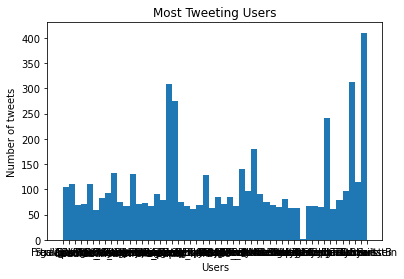

In [6]:
covid_hist=covid[covid["screen_name"].str.contains('|'.join(most_tweeted_users.index))]
covid_hist

plt.hist(covid_hist["screen_name"], bins=50)
plt.title("Most Tweeting Users")
plt.xlabel("Users")
plt.ylabel("Number of tweets")


#### Question 5

Identify duplicate tweets based on the 'text' field.

In [7]:
print("Which tweets are duplicated?:")
print(covid.duplicated(subset=['text'], keep='first'))

duplicated_rows=covid[covid.duplicated(subset=['text'], keep='first')]
duplicated_rows

Which tweets are duplicated?:
0         False
1         False
2         False
3         False
4         False
          ...  
541788     True
541789     True
541790     True
541791     True
541792     True
Length: 541793, dtype: bool


,Unnamed: 0,Unnamed: 0.1,coordinates,country,created_at,device,entity_hashtags,entity_mentions,entity_type,entity_urls,in_reply_to_user_id,is_retweet,screen_name,text,tweet_location,user_followers,user_following,user_location
12,34658,34658,NaN,NaN,2020-03-03 02:49:47,Twitter for Android,[],['NYGovCuomo'],NaN,[],NaN,True,NowItsOurTurn1,RT @NYGovCuomo: BREAKING: I am announcing a new directive requiring NY health insurers to waive cost sharing associated with testing for #c…,NaN,763,1106,NaN
14,34660,34660,NaN,NaN,2020-03-03 02:49:47,Twitter Web App,[],['NYGovCuomo'],NaN,[],NaN,True,blinxeto,RT @NYGovCuomo: BREAKING: I am announcing a new directive requiring NY health insurers to waive cost sharing associated with testing for #c…,NaN,97,50,NaN
15,34661,34661,NaN,NaN,2020-03-03 02:49:46,Twitter for iPhone,[],['NYGovCuomo'],NaN,[],NaN,True,heyitsallcool,RT @NYGovCuomo: BREAKING: I am announcing a new directive requiring NY health insurers to waive cost sharing associated with testing for #c…,NaN,592,552,NaN
18,34664,34664,NaN,NaN,2020-03-03 02:49:46,Twitter for Android,[],['shobey_edits'],NaN,[],NaN,True,luizywooya,"RT @shobey_edits: sent a mail to marvel ent, regarding dogyul and dongpyo's fm asking about any update in-line with covid-19 and finally go…",NaN,3723,3771,\n\nᴿʸᵉᵒⁿˢᵉᵘⁿᵍ🍑ᵐᵘˡᶠᵃⁿᵈ🍕ᵉⁿᵍ/ⁱⁿᵈ
19,34665,34665,NaN,NaN,2020-03-03 02:49:46,Twitter for Android,[],['shobey_edits'],NaN,[],NaN,True,ljhuyeuye,"RT @shobey_edits: sent a mail to marvel ent, regarding dogyul and dongpyo's fm asking about any update in-line with covid-19 and finally go…",NaN,489,1152,x98it
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541788,1048570,1050544,NaN,NaN,2020-02-29 17:56:27,Twitter for Android,['COVID19'],['Laurie_Garrett'],NaN,[],NaN,True,Who_IsM,"RT @Laurie_Garrett: If the US govt keeps billing Americans $1000s for evacuations and #COVID19 quarantine, people who are infected will hid…",NaN,1937,4996,Earth
541789,1048571,1050545,NaN,NaN,2020-02-29 17:56:27,Twitter for iPhone,['coronavirus'],['tancredipalmeri'],NaN,[],NaN,True,orionmaggi,RT @tancredipalmeri: The #coronavirus cases in Italy: (accumulative count) Day1: 14cases/1dead Day2: 76/2 Day3: 153/3 Day4: 231/7 Day5: 37…,NaN,162,587,New England
541790,1048572,1050546,NaN,NaN,2020-02-29 17:56:25,Twitter for iPhone,[],['treasonstickers'],NaN,[],NaN,True,Peace_NH,"RT @treasonstickers: FUN FACT: Donald Trump is the first President in US history to get impeached, botch a pandemic quarantine and cause a…",NaN,594,434,New Hampshire
541791,1048573,1050547,NaN,NaN,2020-02-29 17:56:25,Twitter for iPhone,[],['washingtonpost'],NaN,[],NaN,True,avoidchaos,"RT @washingtonpost: DHS employee told to report to work in Newark after China travel, in violation of coronavirus quarantine, complaints sa…",NaN,766,518,"Los Angeles, CA"


#### Question 6

Remove duplicate tweets based on the 'text' field. How many tweets do you have now?

In [8]:
print("The number of tweets before removing duplicates is", len(covid))
covid_nonduplicated=covid.drop_duplicates(subset=['text'], keep='first')
print("The number of tweets after removing duplicates is", len(covid_nonduplicated))
covid_nonduplicated

The number of tweets before removing duplicates is 541793
The number of tweets after removing duplicates is 120801


,Unnamed: 0,Unnamed: 0.1,coordinates,country,created_at,device,entity_hashtags,entity_mentions,entity_type,entity_urls,in_reply_to_user_id,is_retweet,screen_name,text,tweet_location,user_followers,user_following,user_location
0,34646,34646,NaN,NaN,2020-03-03 02:49:50,Twitter for iPhone,[],[],NaN,['twitter.com/i/web/status/1…'],NaN,False,Manny_Alicandro,"Every 3 days? Coronavirus in NY? Workers will disinfect parts of subways, buses every 72 hours as New York reports… https://t.co/sxVkmdTeME",NaN,9125,4872,NY
1,34647,34647,NaN,NaN,2020-03-03 02:49:50,Twitter for Android,[],['shobey_edits'],NaN,[],NaN,True,wodzd,"RT @shobey_edits: sent a mail to marvel ent, regarding dogyul and dongpyo's fm asking about any update in-line with covid-19 and finally go…",NaN,3123,3103,𝐗𝐎𝐧𝐞𝐈𝐭
2,34648,34648,NaN,NaN,2020-03-03 02:49:50,Twitter for iPhone,[],['realDonaldTrump'],NaN,['twitter.com/i/web/status/1…'],25073877.0,False,mom2speak1,"@realDonaldTrump Wow, a nice incubator for COVID-19! But hey, what do epidemiologists know, right Donny? Make Ameri… https://t.co/FCk8mUHmKe",NaN,313,1149,United States
3,34649,34649,NaN,NaN,2020-03-03 02:49:50,Twitter Web App,[],['uk_domain_names'],NaN,[],NaN,True,lazaroumterror,"RT @uk_domain_names: ""UK and Scottish government modelling shows that the economic and fiscal costs of a Covid-19 epidemic could be on a pa…",NaN,3871,3935,London
4,34650,34650,NaN,NaN,2020-03-03 02:49:50,Twitter Web App,[],['LanceHoward70'],NaN,[],NaN,True,astro_stephen13,"RT @LanceHoward70: This 👇 is the leader of the free world, folks. A man who does not understand that the “flu shot” will not work as a vacc…",NaN,538,367,"Georgia, USA"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541769,1048551,1050525,NaN,NaN,2020-02-29 17:56:51,Twitter for iPhone,[],[],NaN,[],NaN,False,MANLIKEAFRIKA,All These People Choosing To Travel All Around The Place Right Now Need To Stay In Quarantine When The Time Comes 😤😷,NaN,271,262,NaN
541777,1048559,1050533,NaN,NaN,2020-02-29 17:56:44,Twitter for Android,[],[],NaN,['rawstory.com/2020/02/quaran…'],NaN,False,timmins316,Quarantine patient assures Fox News coronavirus isn’t ‘scary’ because he has no symptoms https://t.co/MtdTjlReX7,NaN,2069,5001,"Kingston, Ontario"
541778,1048560,1050534,NaN,NaN,2020-02-29 17:56:43,Twitter Web App,[],[],NaN,['twitter.com/i/web/status/1…'],NaN,False,the_stormclam,"America had better figure out the answer to ""who pays for the expenses of forced quarantine"" on a national scale an… https://t.co/610bE2e4Ny",NaN,138,518,NaN
541785,1048567,1050541,NaN,NaN,2020-02-29 17:56:34,Twitter Web App,[],"['DirtyCopHunter', 'tedlieu', 'realDonaldTrump']",NaN,['twitter.com/i/web/status/1…'],120978797.0,False,zingertat,"@DirtyCopHunter @tedlieu @realDonaldTrump if it is just the flu, why do countries feel the need to quarantine a who… https://t.co/nvyf9DoJ6t",NaN,31,44,NaN


#### Question 7

Replace all users names in the 'text' field with the usrusr token. You need to write a regular expression that identify user names and use the replace method to replace it with the 'usrusr' token. For instance:  

"Are you there @ahurriyetoglu" should be "Are you there usrusr"

In [9]:
covid_q7 = covid_nonduplicated.copy()
covid_q7['text']=covid_q7['text'].str.replace(r'@([a-zA-Z0-9]+(?:_[a-zA-Z0-9]+)*)', 'usrusr')
covid_q7

,Unnamed: 0,Unnamed: 0.1,coordinates,country,created_at,device,entity_hashtags,entity_mentions,entity_type,entity_urls,in_reply_to_user_id,is_retweet,screen_name,text,tweet_location,user_followers,user_following,user_location
0,34646,34646,NaN,NaN,2020-03-03 02:49:50,Twitter for iPhone,[],[],NaN,['twitter.com/i/web/status/1…'],NaN,False,Manny_Alicandro,"Every 3 days? Coronavirus in NY? Workers will disinfect parts of subways, buses every 72 hours as New York reports… https://t.co/sxVkmdTeME",NaN,9125,4872,NY
1,34647,34647,NaN,NaN,2020-03-03 02:49:50,Twitter for Android,[],['shobey_edits'],NaN,[],NaN,True,wodzd,"RT usrusr: sent a mail to marvel ent, regarding dogyul and dongpyo's fm asking about any update in-line with covid-19 and finally go…",NaN,3123,3103,𝐗𝐎𝐧𝐞𝐈𝐭
2,34648,34648,NaN,NaN,2020-03-03 02:49:50,Twitter for iPhone,[],['realDonaldTrump'],NaN,['twitter.com/i/web/status/1…'],25073877.0,False,mom2speak1,"usrusr Wow, a nice incubator for COVID-19! But hey, what do epidemiologists know, right Donny? Make Ameri… https://t.co/FCk8mUHmKe",NaN,313,1149,United States
3,34649,34649,NaN,NaN,2020-03-03 02:49:50,Twitter Web App,[],['uk_domain_names'],NaN,[],NaN,True,lazaroumterror,"RT usrusr: ""UK and Scottish government modelling shows that the economic and fiscal costs of a Covid-19 epidemic could be on a pa…",NaN,3871,3935,London
4,34650,34650,NaN,NaN,2020-03-03 02:49:50,Twitter Web App,[],['LanceHoward70'],NaN,[],NaN,True,astro_stephen13,"RT usrusr: This 👇 is the leader of the free world, folks. A man who does not understand that the “flu shot” will not work as a vacc…",NaN,538,367,"Georgia, USA"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541769,1048551,1050525,NaN,NaN,2020-02-29 17:56:51,Twitter for iPhone,[],[],NaN,[],NaN,False,MANLIKEAFRIKA,All These People Choosing To Travel All Around The Place Right Now Need To Stay In Quarantine When The Time Comes 😤😷,NaN,271,262,NaN
541777,1048559,1050533,NaN,NaN,2020-02-29 17:56:44,Twitter for Android,[],[],NaN,['rawstory.com/2020/02/quaran…'],NaN,False,timmins316,Quarantine patient assures Fox News coronavirus isn’t ‘scary’ because he has no symptoms https://t.co/MtdTjlReX7,NaN,2069,5001,"Kingston, Ontario"
541778,1048560,1050534,NaN,NaN,2020-02-29 17:56:43,Twitter Web App,[],[],NaN,['twitter.com/i/web/status/1…'],NaN,False,the_stormclam,"America had better figure out the answer to ""who pays for the expenses of forced quarantine"" on a national scale an… https://t.co/610bE2e4Ny",NaN,138,518,NaN
541785,1048567,1050541,NaN,NaN,2020-02-29 17:56:34,Twitter Web App,[],"['DirtyCopHunter', 'tedlieu', 'realDonaldTrump']",NaN,['twitter.com/i/web/status/1…'],120978797.0,False,zingertat,"usrusr usrusr usrusr if it is just the flu, why do countries feel the need to quarantine a who… https://t.co/nvyf9DoJ6t",NaN,31,44,NaN


#### Question 8

Replace all URLs with 'urlurl' token in the 'text' column. For instance:  

"Please visit http://ku.edu.tr" should be "Please visit urlurl".

In [10]:
covid_q8 = covid_q7.copy()
covid_q8['text']=covid_q8['text'].str.replace("https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]+\.[^\s]{2,}|www\.[a-zA-Z0-9]+\.[^\s]{2,}", "urlurl")
covid_q8

,Unnamed: 0,Unnamed: 0.1,coordinates,country,created_at,device,entity_hashtags,entity_mentions,entity_type,entity_urls,in_reply_to_user_id,is_retweet,screen_name,text,tweet_location,user_followers,user_following,user_location
0,34646,34646,NaN,NaN,2020-03-03 02:49:50,Twitter for iPhone,[],[],NaN,['twitter.com/i/web/status/1…'],NaN,False,Manny_Alicandro,"Every 3 days? Coronavirus in NY? Workers will disinfect parts of subways, buses every 72 hours as New York reports… urlurl",NaN,9125,4872,NY
1,34647,34647,NaN,NaN,2020-03-03 02:49:50,Twitter for Android,[],['shobey_edits'],NaN,[],NaN,True,wodzd,"RT usrusr: sent a mail to marvel ent, regarding dogyul and dongpyo's fm asking about any update in-line with covid-19 and finally go…",NaN,3123,3103,𝐗𝐎𝐧𝐞𝐈𝐭
2,34648,34648,NaN,NaN,2020-03-03 02:49:50,Twitter for iPhone,[],['realDonaldTrump'],NaN,['twitter.com/i/web/status/1…'],25073877.0,False,mom2speak1,"usrusr Wow, a nice incubator for COVID-19! But hey, what do epidemiologists know, right Donny? Make Ameri… urlurl",NaN,313,1149,United States
3,34649,34649,NaN,NaN,2020-03-03 02:49:50,Twitter Web App,[],['uk_domain_names'],NaN,[],NaN,True,lazaroumterror,"RT usrusr: ""UK and Scottish government modelling shows that the economic and fiscal costs of a Covid-19 epidemic could be on a pa…",NaN,3871,3935,London
4,34650,34650,NaN,NaN,2020-03-03 02:49:50,Twitter Web App,[],['LanceHoward70'],NaN,[],NaN,True,astro_stephen13,"RT usrusr: This 👇 is the leader of the free world, folks. A man who does not understand that the “flu shot” will not work as a vacc…",NaN,538,367,"Georgia, USA"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541769,1048551,1050525,NaN,NaN,2020-02-29 17:56:51,Twitter for iPhone,[],[],NaN,[],NaN,False,MANLIKEAFRIKA,All These People Choosing To Travel All Around The Place Right Now Need To Stay In Quarantine When The Time Comes 😤😷,NaN,271,262,NaN
541777,1048559,1050533,NaN,NaN,2020-02-29 17:56:44,Twitter for Android,[],[],NaN,['rawstory.com/2020/02/quaran…'],NaN,False,timmins316,Quarantine patient assures Fox News coronavirus isn’t ‘scary’ because he has no symptoms urlurl,NaN,2069,5001,"Kingston, Ontario"
541778,1048560,1050534,NaN,NaN,2020-02-29 17:56:43,Twitter Web App,[],[],NaN,['twitter.com/i/web/status/1…'],NaN,False,the_stormclam,"America had better figure out the answer to ""who pays for the expenses of forced quarantine"" on a national scale an… urlurl",NaN,138,518,NaN
541785,1048567,1050541,NaN,NaN,2020-02-29 17:56:34,Twitter Web App,[],"['DirtyCopHunter', 'tedlieu', 'realDonaldTrump']",NaN,['twitter.com/i/web/status/1…'],120978797.0,False,zingertat,"usrusr usrusr usrusr if it is just the flu, why do countries feel the need to quarantine a who… urlurl",NaN,31,44,NaN


#### Question 9

If a tweet starts with "RT @", it is a retweet. Remove all retweets from the dataframe.

In [11]:
#I will continue with the dataframe from Question 8, so retweets will start with "RT usrusr"
covid_q9=covid_q8.copy()
covid_q9["RT or not"]=covid_q9['text'].str.contains("RT usrusr")
covid_q9=covid_q9.drop(covid_q9[covid_q9['RT or not'] == True].index)


#Then I will not need "RT or not" column anymore, so I can remove it.
covid_q9=covid_q9.drop(["RT or not"], axis=1)
covid_q9


,Unnamed: 0,Unnamed: 0.1,coordinates,country,created_at,device,entity_hashtags,entity_mentions,entity_type,entity_urls,in_reply_to_user_id,is_retweet,screen_name,text,tweet_location,user_followers,user_following,user_location
0,34646,34646,NaN,NaN,2020-03-03 02:49:50,Twitter for iPhone,[],[],NaN,['twitter.com/i/web/status/1…'],NaN,False,Manny_Alicandro,"Every 3 days? Coronavirus in NY? Workers will disinfect parts of subways, buses every 72 hours as New York reports… urlurl",NaN,9125,4872,NY
2,34648,34648,NaN,NaN,2020-03-03 02:49:50,Twitter for iPhone,[],['realDonaldTrump'],NaN,['twitter.com/i/web/status/1…'],25073877.0,False,mom2speak1,"usrusr Wow, a nice incubator for COVID-19! But hey, what do epidemiologists know, right Donny? Make Ameri… urlurl",NaN,313,1149,United States
16,34662,34662,NaN,NaN,2020-03-03 02:49:46,Twitter Web Client,[],['abcnews'],NaN,['abc.net.au/news/2020-03-0…'],NaN,False,MackayIM,Queensland to triple hospital emergency department capacity amid coronavirus spread urlurl via usrusr,NaN,50033,4435,"Brisbane, Australia"
24,34670,34670,NaN,NaN,2020-03-03 02:49:44,Twitter Web Client,[],[],NaN,['skwawkbox.org/2020/03/02/wim…'],NaN,False,Hephaestus7,Wimbledon school closes as inadequate govt response to COVID-19 continues | The SKWAWKBOX urlurl,NaN,14863,16307,Canada
25,34671,34671,NaN,NaN,2020-03-03 02:49:44,Twitter Web App,['COVIDー19'],[],NaN,['twitter.com/i/web/status/1…'],NaN,False,TJCinRaleigh,BREAKING NEWS: CDC WILL NO LONGER REPORT HOW MANY PEOPLE HAVE BEEN TESTED FOR #COVIDー19 The coverup up continues.… urlurl,NaN,513,851,"Raleigh, NC"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541769,1048551,1050525,NaN,NaN,2020-02-29 17:56:51,Twitter for iPhone,[],[],NaN,[],NaN,False,MANLIKEAFRIKA,All These People Choosing To Travel All Around The Place Right Now Need To Stay In Quarantine When The Time Comes 😤😷,NaN,271,262,NaN
541777,1048559,1050533,NaN,NaN,2020-02-29 17:56:44,Twitter for Android,[],[],NaN,['rawstory.com/2020/02/quaran…'],NaN,False,timmins316,Quarantine patient assures Fox News coronavirus isn’t ‘scary’ because he has no symptoms urlurl,NaN,2069,5001,"Kingston, Ontario"
541778,1048560,1050534,NaN,NaN,2020-02-29 17:56:43,Twitter Web App,[],[],NaN,['twitter.com/i/web/status/1…'],NaN,False,the_stormclam,"America had better figure out the answer to ""who pays for the expenses of forced quarantine"" on a national scale an… urlurl",NaN,138,518,NaN
541785,1048567,1050541,NaN,NaN,2020-02-29 17:56:34,Twitter Web App,[],"['DirtyCopHunter', 'tedlieu', 'realDonaldTrump']",NaN,['twitter.com/i/web/status/1…'],120978797.0,False,zingertat,"usrusr usrusr usrusr if it is just the flu, why do countries feel the need to quarantine a who… urlurl",NaN,31,44,NaN


#### Question 10

If the field is_retweet contains the value True, this tweet is a retweet as well. Remove those as well.

In [12]:
covid_q10 = covid_q9.copy()
covid_q10=covid_q10.drop(covid_q9[covid_q9['is_retweet'] == True].index)
covid_q10

,Unnamed: 0,Unnamed: 0.1,coordinates,country,created_at,device,entity_hashtags,entity_mentions,entity_type,entity_urls,in_reply_to_user_id,is_retweet,screen_name,text,tweet_location,user_followers,user_following,user_location
0,34646,34646,NaN,NaN,2020-03-03 02:49:50,Twitter for iPhone,[],[],NaN,['twitter.com/i/web/status/1…'],NaN,False,Manny_Alicandro,"Every 3 days? Coronavirus in NY? Workers will disinfect parts of subways, buses every 72 hours as New York reports… urlurl",NaN,9125,4872,NY
2,34648,34648,NaN,NaN,2020-03-03 02:49:50,Twitter for iPhone,[],['realDonaldTrump'],NaN,['twitter.com/i/web/status/1…'],25073877.0,False,mom2speak1,"usrusr Wow, a nice incubator for COVID-19! But hey, what do epidemiologists know, right Donny? Make Ameri… urlurl",NaN,313,1149,United States
16,34662,34662,NaN,NaN,2020-03-03 02:49:46,Twitter Web Client,[],['abcnews'],NaN,['abc.net.au/news/2020-03-0…'],NaN,False,MackayIM,Queensland to triple hospital emergency department capacity amid coronavirus spread urlurl via usrusr,NaN,50033,4435,"Brisbane, Australia"
24,34670,34670,NaN,NaN,2020-03-03 02:49:44,Twitter Web Client,[],[],NaN,['skwawkbox.org/2020/03/02/wim…'],NaN,False,Hephaestus7,Wimbledon school closes as inadequate govt response to COVID-19 continues | The SKWAWKBOX urlurl,NaN,14863,16307,Canada
25,34671,34671,NaN,NaN,2020-03-03 02:49:44,Twitter Web App,['COVIDー19'],[],NaN,['twitter.com/i/web/status/1…'],NaN,False,TJCinRaleigh,BREAKING NEWS: CDC WILL NO LONGER REPORT HOW MANY PEOPLE HAVE BEEN TESTED FOR #COVIDー19 The coverup up continues.… urlurl,NaN,513,851,"Raleigh, NC"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541769,1048551,1050525,NaN,NaN,2020-02-29 17:56:51,Twitter for iPhone,[],[],NaN,[],NaN,False,MANLIKEAFRIKA,All These People Choosing To Travel All Around The Place Right Now Need To Stay In Quarantine When The Time Comes 😤😷,NaN,271,262,NaN
541777,1048559,1050533,NaN,NaN,2020-02-29 17:56:44,Twitter for Android,[],[],NaN,['rawstory.com/2020/02/quaran…'],NaN,False,timmins316,Quarantine patient assures Fox News coronavirus isn’t ‘scary’ because he has no symptoms urlurl,NaN,2069,5001,"Kingston, Ontario"
541778,1048560,1050534,NaN,NaN,2020-02-29 17:56:43,Twitter Web App,[],[],NaN,['twitter.com/i/web/status/1…'],NaN,False,the_stormclam,"America had better figure out the answer to ""who pays for the expenses of forced quarantine"" on a national scale an… urlurl",NaN,138,518,NaN
541785,1048567,1050541,NaN,NaN,2020-02-29 17:56:34,Twitter Web App,[],"['DirtyCopHunter', 'tedlieu', 'realDonaldTrump']",NaN,['twitter.com/i/web/status/1…'],120978797.0,False,zingertat,"usrusr usrusr usrusr if it is just the flu, why do countries feel the need to quarantine a who… urlurl",NaN,31,44,NaN


#### Question 11

Check how many duplicate tweets are there. Remove them. How many tweets do you have now?

In [13]:
#covid_q11.duplicated(subset=["text"])
covid_q11=covid_q10.drop_duplicates(subset=['text'], keep='first')
print("The number of tweets that I have is", len(covid_q11))
covid_q11

The number of tweets that I have is 71201


,Unnamed: 0,Unnamed: 0.1,coordinates,country,created_at,device,entity_hashtags,entity_mentions,entity_type,entity_urls,in_reply_to_user_id,is_retweet,screen_name,text,tweet_location,user_followers,user_following,user_location
0,34646,34646,NaN,NaN,2020-03-03 02:49:50,Twitter for iPhone,[],[],NaN,['twitter.com/i/web/status/1…'],NaN,False,Manny_Alicandro,"Every 3 days? Coronavirus in NY? Workers will disinfect parts of subways, buses every 72 hours as New York reports… urlurl",NaN,9125,4872,NY
2,34648,34648,NaN,NaN,2020-03-03 02:49:50,Twitter for iPhone,[],['realDonaldTrump'],NaN,['twitter.com/i/web/status/1…'],2.507388e+07,False,mom2speak1,"usrusr Wow, a nice incubator for COVID-19! But hey, what do epidemiologists know, right Donny? Make Ameri… urlurl",NaN,313,1149,United States
16,34662,34662,NaN,NaN,2020-03-03 02:49:46,Twitter Web Client,[],['abcnews'],NaN,['abc.net.au/news/2020-03-0…'],NaN,False,MackayIM,Queensland to triple hospital emergency department capacity amid coronavirus spread urlurl via usrusr,NaN,50033,4435,"Brisbane, Australia"
24,34670,34670,NaN,NaN,2020-03-03 02:49:44,Twitter Web Client,[],[],NaN,['skwawkbox.org/2020/03/02/wim…'],NaN,False,Hephaestus7,Wimbledon school closes as inadequate govt response to COVID-19 continues | The SKWAWKBOX urlurl,NaN,14863,16307,Canada
25,34671,34671,NaN,NaN,2020-03-03 02:49:44,Twitter Web App,['COVIDー19'],[],NaN,['twitter.com/i/web/status/1…'],NaN,False,TJCinRaleigh,BREAKING NEWS: CDC WILL NO LONGER REPORT HOW MANY PEOPLE HAVE BEEN TESTED FOR #COVIDー19 The coverup up continues.… urlurl,NaN,513,851,"Raleigh, NC"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541763,1048545,1050519,NaN,NaN,2020-02-29 17:57:01,Twitter for iPhone,[],"['barbaraward235', 'HanianEmpress', 'cracraft_teresa', 'realDonaldTrump']",NaN,['twitter.com/i/web/status/1…'],3.349130e+09,False,LisaSeaman8,usrusr usrusr usrusr usrusr We have 11 confirmed here in San Antonio at Lackla… urlurl,NaN,388,396,"San Antonio, TX"
541769,1048551,1050525,NaN,NaN,2020-02-29 17:56:51,Twitter for iPhone,[],[],NaN,[],NaN,False,MANLIKEAFRIKA,All These People Choosing To Travel All Around The Place Right Now Need To Stay In Quarantine When The Time Comes 😤😷,NaN,271,262,NaN
541778,1048560,1050534,NaN,NaN,2020-02-29 17:56:43,Twitter Web App,[],[],NaN,['twitter.com/i/web/status/1…'],NaN,False,the_stormclam,"America had better figure out the answer to ""who pays for the expenses of forced quarantine"" on a national scale an… urlurl",NaN,138,518,NaN
541785,1048567,1050541,NaN,NaN,2020-02-29 17:56:34,Twitter Web App,[],"['DirtyCopHunter', 'tedlieu', 'realDonaldTrump']",NaN,['twitter.com/i/web/status/1…'],1.209788e+08,False,zingertat,"usrusr usrusr usrusr if it is just the flu, why do countries feel the need to quarantine a who… urlurl",NaN,31,44,NaN


#### Question 12

Plot a histogram of the text lengths. What is the length of the longest and the shortest tweets?

0         117
2         101
16         89
24         90
25        115
         ... 
541763     56
541769    116
541778    117
541785     78
541786     32
Name: text_length, Length: 71201, dtype: int64


Text(0, 0.5, 'Number of tweets')

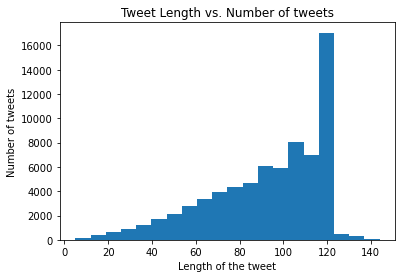

In [14]:
#Deleting usrusr and urlurl from tweets in "text" column will help to count the length of the tweet itself.

covid_q12 = covid_q11.copy()
covid_q12["text"] = covid_q12["text"].str.replace("usrusr","")
covid_q12["text"] = covid_q12["text"].str.replace("urlurl","")
covid_q12["text_length"]=covid_q12.text.str.len()
print(covid_q12["text_length"])

plt.hist(covid_q12["text_length"], bins=20)
plt.title("Tweet Length vs. Number of tweets")
plt.xlabel("Length of the tweet")
plt.ylabel("Number of tweets")

#### Question 13

Calculate the average tweet length based on the 'text' field.

In [15]:
average = covid_q12["text_length"].mean()
print("The average tweet length is", int(average))

The average tweet length is 92


#### Question 14

Extract all words from the 'text' field and put them in a new column. The findall method and a regular expression to recognize words will help you.

In [16]:
covid_q14 = covid_q12.copy()
covid_q14["words"]=covid_q14["text"].str.findall(r'(\w+)', flags=re.IGNORECASE)
covid_q14

,Unnamed: 0,Unnamed: 0.1,coordinates,country,created_at,device,entity_hashtags,entity_mentions,entity_type,entity_urls,in_reply_to_user_id,is_retweet,screen_name,text,tweet_location,user_followers,user_following,user_location,text_length,words
0,34646,34646,NaN,NaN,2020-03-03 02:49:50,Twitter for iPhone,[],[],NaN,['twitter.com/i/web/status/1…'],NaN,False,Manny_Alicandro,"Every 3 days? Coronavirus in NY? Workers will disinfect parts of subways, buses every 72 hours as New York reports…",NaN,9125,4872,NY,117,"[Every, 3, days, Coronavirus, in, NY, Workers, will, disinfect, parts, of, subways, buses, every, 72, hours, as, New, York, reports]"
2,34648,34648,NaN,NaN,2020-03-03 02:49:50,Twitter for iPhone,[],['realDonaldTrump'],NaN,['twitter.com/i/web/status/1…'],2.507388e+07,False,mom2speak1,"Wow, a nice incubator for COVID-19! But hey, what do epidemiologists know, right Donny? Make Ameri…",NaN,313,1149,United States,101,"[Wow, a, nice, incubator, for, COVID, 19, But, hey, what, do, epidemiologists, know, right, Donny, Make, Ameri]"
16,34662,34662,NaN,NaN,2020-03-03 02:49:46,Twitter Web Client,[],['abcnews'],NaN,['abc.net.au/news/2020-03-0…'],NaN,False,MackayIM,Queensland to triple hospital emergency department capacity amid coronavirus spread via,NaN,50033,4435,"Brisbane, Australia",89,"[Queensland, to, triple, hospital, emergency, department, capacity, amid, coronavirus, spread, via]"
24,34670,34670,NaN,NaN,2020-03-03 02:49:44,Twitter Web Client,[],[],NaN,['skwawkbox.org/2020/03/02/wim…'],NaN,False,Hephaestus7,Wimbledon school closes as inadequate govt response to COVID-19 continues | The SKWAWKBOX,NaN,14863,16307,Canada,90,"[Wimbledon, school, closes, as, inadequate, govt, response, to, COVID, 19, continues, The, SKWAWKBOX]"
25,34671,34671,NaN,NaN,2020-03-03 02:49:44,Twitter Web App,['COVIDー19'],[],NaN,['twitter.com/i/web/status/1…'],NaN,False,TJCinRaleigh,BREAKING NEWS: CDC WILL NO LONGER REPORT HOW MANY PEOPLE HAVE BEEN TESTED FOR #COVIDー19 The coverup up continues.…,NaN,513,851,"Raleigh, NC",115,"[BREAKING, NEWS, CDC, WILL, NO, LONGER, REPORT, HOW, MANY, PEOPLE, HAVE, BEEN, TESTED, FOR, COVIDー19, The, coverup, up, continues]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541763,1048545,1050519,NaN,NaN,2020-02-29 17:57:01,Twitter for iPhone,[],"['barbaraward235', 'HanianEmpress', 'cracraft_teresa', 'realDonaldTrump']",NaN,['twitter.com/i/web/status/1…'],3.349130e+09,False,LisaSeaman8,We have 11 confirmed here in San Antonio at Lackla…,NaN,388,396,"San Antonio, TX",56,"[We, have, 11, confirmed, here, in, San, Antonio, at, Lackla]"
541769,1048551,1050525,NaN,NaN,2020-02-29 17:56:51,Twitter for iPhone,[],[],NaN,[],NaN,False,MANLIKEAFRIKA,All These People Choosing To Travel All Around The Place Right Now Need To Stay In Quarantine When The Time Comes 😤😷,NaN,271,262,NaN,116,"[All, These, People, Choosing, To, Travel, All, Around, The, Place, Right, Now, Need, To, Stay, In, Quarantine, When, The, Time, Comes]"
541778,1048560,1050534,NaN,NaN,2020-02-29 17:56:43,Twitter Web App,[],[],NaN,['twitter.com/i/web/status/1…'],NaN,False,the_stormclam,"America had better figure out the answer to ""who pays for the expenses of forced quarantine"" on a national scale an…",NaN,138,518,NaN,117,"[America, had, better, figure, out, the, answer, to, who, pays, for, the, expenses, of, forced, quarantine, on, a, national, scale, an]"
541785,1048567,1050541,NaN,NaN,2020-02-29 17:56:34,Twitter Web App,[],"['DirtyCopHunter', 'tedlieu', 'realDonaldTrump']",NaN,['twitter.com/i/web/status/1…'],1.209788e+08,False,zingertat,"if it is just the flu, why do countries feel the need to quarantine a who…",NaN,31,44,NaN,78,"[if, it, is, just, the, flu, why, do, countries, feel, the, need, to, quarantine, a, who]"


#### Question 15

Identify the words that occur the most. The Counter object from collections will help you.

In [17]:
from collections import Counter

words_counter = Counter()
covid_q14['words'].apply(words_counter.update)
print(words_counter)

Counter({'the': 39097, 'to': 26416, 'coronavirus': 21144, 'of': 20666, 'in': 17929, 'a': 16790, 'Coronavirus': 15439, 'is': 15028, 'and': 14721, 'for': 10402, 's': 9822, 'I': 9653, 'on': 7754, 'The': 7166, 'that': 7089, 'you': 6723, 'are': 6632, 'it': 6428, 't': 6310, '19': 6184, 'from': 6019, 'quarantine': 5964, 'outbreak': 5668, 'with': 5544, 'this': 5417, 'have': 5162, 'be': 5091, 'COVID': 4834, 'not': 4516, 'has': 4490, 'as': 4272, 'about': 4125, 'people': 3936, '2019': 3431, 'at': 3427, 'Trump': 3404, 'cases': 3373, 'China': 3284, 'we': 3170, 'will': 3118, 'CDC': 2904, 'all': 2862, 'they': 2809, 'virus': 2808, 'by': 2781, 'was': 2734, 'can': 2682, 'but': 2606, 'if': 2551, 'via': 2474, 'new': 2251, 'more': 2244, 'an': 2238, 'just': 2228, 'It': 2220, 'your': 2196, 'been': 2173, 'nCoV': 2136, '2': 2133, 'This': 2121, 'US': 2116, 'who': 2102, 'amp': 2079, 'COVID19': 2045, 'or': 2031, 'out': 2010, 'my': 1997, 'like': 1968, 'A': 1917, 'up': 1896, 'now': 1848, 'so': 1825, 'he': 1822, 'ho

#### Question 16

How many of the words occur only once? List 100 of them. Provide tweets that contain these words.

In [30]:
import operator
least_common100=words_counter.most_common()[:-101:-1]   
print(least_common100)
print()
least_words=[]
for each_tuple in least_common100:
    least_words.append(each_tuple[0])

print(least_words)
covid_q16=covid_q14[covid_q14["text"].str.contains('|'.join(least_words))]
covid_q16

[('kwanza', 1), ('Umeenda', 1), ('Lackla', 1), ('Hamburg', 1), ('screenplay', 1), ('Coul', 1), ('chinesecitizens', 1), ('REFUSED', 1), ('Day5', 1), ('Michiga', 1), ('andfoxnews', 1), ('floe', 1), ('fukks', 1), ('cooperating', 1), ('volunteering', 1), ('mammals', 1), ('CoronaChan', 1), ('Maj', 1), ('shorts', 1), ('IMH', 1), ('martiallaw', 1), ('Prepar', 1), ('85688', 1), ('Nooooooo', 1), ('hatfield2020', 1), ('Hatfield', 1), ('Toron', 1), ('Paramedics', 1), ('Professionally', 1), ('Flickr', 1), ('predisposition', 1), ('gddamn', 1), ('RuPaul', 1), ('mydude', 1), ('Panopticism', 1), ('Discipline', 1), ('chuckie', 1), ('dozing', 1), ('motherinlaw', 1), ('daggers', 1), ('_HughFriel', 1), ('jared', 1), ('DingoDonnit', 1), ('Goi', 1), ('70F', 1), ('Slept', 1), ('19c', 1), ('podding', 1), ('doofus', 1), ('Cudos', 1), ('Shes', 1), ('Praising', 1), ('gastrointestin', 1), ('Presto', 1), ('_Anunnery', 1), ('looters', 1), ('habitable', 1), ('Jorgenson', 1), ('Scaling', 1), ('Wapo', 1), ('Parmet', 1

,Unnamed: 0,Unnamed: 0.1,coordinates,country,created_at,device,entity_hashtags,entity_mentions,entity_type,entity_urls,in_reply_to_user_id,is_retweet,screen_name,text,tweet_location,user_followers,user_following,user_location,text_length,words
554,35200,35200,NaN,NaN,2020-03-03 02:46:45,Twitter for Android,[],['drharshvardhan'],NaN,['twitter.com/i/web/status/1…'],7.773218e+07,False,paidalwarsagar,Better we do COVID 19 test mandatory to each person in India and then isolate the people if they in…,NaN,2,149,NaN,102,"[Better, we, do, COVID, 19, test, mandatory, to, each, person, in, India, and, then, isolate, the, people, if, they, in]"
770,35416,35416,NaN,NaN,2020-03-03 02:45:35,Twitter for iPhone,[],[],NaN,[],NaN,False,mzak123,"IMHO, if Trump continues to mismanage and jawbone the COVID-19 crisis, then he won’t need a recession to lose in November.",NaN,1045,684,NaN,122,"[IMHO, if, Trump, continues, to, mismanage, and, jawbone, the, COVID, 19, crisis, then, he, won, t, need, a, recession, to, lose, in, November]"
854,35500,35500,NaN,NaN,2020-03-03 02:45:04,Salesforce - Social Studio,[],[],NaN,['citynews1130.com/video/2020/03/…'],NaN,False,CityNewsVAN,How effective is self-isolation? Plus how COVID-19 misinformation is hurting a Toronto business.,NaN,23694,1509,"Vancouver, British Columbia",97,"[How, effective, is, self, isolation, Plus, how, COVID, 19, misinformation, is, hurting, a, Toronto, business]"
1007,35653,35653,NaN,NaN,2020-03-03 02:44:11,Twitter Web App,"['Prepare', 'Utah']",[],NaN,['twitter.com/i/web/status/1…'],NaN,False,BeReadyUtah,#Prepare to learn what you can do to be ready for and help with the #Utah response to COVID-19…,NaN,13593,1673,Salt Lake City,96,"[Prepare, to, learn, what, you, can, do, to, be, ready, for, and, help, with, the, Utah, response, to, COVID, 19]"
1521,36167,36167,NaN,NaN,2020-03-03 02:40:59,Twitter for Android,[],[],NaN,['twitter.com/i/web/status/1…'],1.190694e+18,False,oba_sjbhs,"Given the prevailing siuation due to the COVID 19 Virus Issue &amp; Singapore Government's Advisory, the SJBHS OBA Asi…",NaN,19,0,Bangalore,121,"[Given, the, prevailing, siuation, due, to, the, COVID, 19, Virus, Issue, amp, Singapore, Government, s, Advisory, the, SJBHS, OBA, Asi]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541686,1048468,1050442,NaN,NaN,2020-02-29 17:58:28,Twitter Web Client,[],['YouTube'],NaN,['youtu.be/_m_YZJDneW4'],NaN,False,PhilipBabb,"Coronavirus Hits Europe, Italy Under Quarantine, ITS GETTING WORSE, Coul... via",NaN,1197,3629,"London, Ontario",81,"[Coronavirus, Hits, Europe, Italy, Under, Quarantine, ITS, GETTING, WORSE, Coul, via]"
541689,1048471,1050445,NaN,NaN,2020-02-29 17:58:23,Twitter for iPhone,['WritingCommunity'],[],photo,[],NaN,False,improvperson,Please quarantine me CDC so that I can get this screenplay done.#WritingCommunity,NaN,571,1375,NaN,82,"[Please, quarantine, me, CDC, so, that, I, can, get, this, screenplay, done, WritingCommunity]"
541723,1048505,1050479,NaN,NaN,2020-02-29 17:57:42,Twitter for Android,[],['AscotBlack'],NaN,['twitter.com/i/web/status/1…'],1.225089e+18,False,rtom098,New case in Hamburg from Iran. Two weeks ago we out everyone coming back from China into 2 weeks quaran…,NaN,9,119,NaN,106,"[New, case, in, Hamburg, from, Iran, Two, weeks, ago, we, out, everyone, coming, back, from, China, into, 2, weeks, quaran]"
541763,1048545,1050519,NaN,NaN,2020-02-29 17:57:01,Twitter for iPhone,[],"['barbaraward235', 'HanianEmpress', 'cracraft_teresa', 'realDonaldTrump']",NaN,['twitter.com/i/web/status/1…'],3.349130e+09,False,LisaSeaman8,We have 11 confirmed here in San Antonio at Lackla…,NaN,388,396,"San Antonio, TX",56,"[We, have, 11, confirmed, here, in, San, Antonio, at, Lackla]"


#### Question 17

Find the longest 100 words. List them.

In [51]:
words=words_counter
word_length=[]
word_length = dict(words).keys()

sorted_length = sorted(word_length, key=len, reverse=True)

print("The number of words in the list is: %s." % (len(word_length)))
print("The shortest word in the list is: %s." % (sorted_length[-1]))
print("The longest word in the list is: %s." % (sorted_length[0]))
print()
print("The longest 100 words in the list are:")
sorted_length[0:100]

The number of words in the list is: 50077.
The shortest word in the list is: ผ.
The longest word in the list is: governmentsof_Japan_italy_Iran_Irak_Palestina_Cisjordnia.

The longest 100 words in the list are:


['governmentsof_Japan_italy_Iran_Irak_Palestina_Cisjordnia',
 'ITBCancellationCouldHurtBalearicBusinesses',
 'CommonGoldenDemocraticEqualityRegionIn',
 'sleepingonthecouchoutsideherbedroom',
 'TacklingNationalSecurityChallenges',
 'Wuhan_Coronavirus_Survival_Manual',
 '22dba8c1e94654caab56b9bb483f7e4a',
 'cc397384a5b258bab403594f4edbb73b',
 '50a0f72b87265844b9b0badc718ef634',
 '917c20aaf12d51beb966474940ac560b',
 '30f33416763b5208957a2d4161c23a45',
 'StrategicWaterInfrastructureLab',
 'Paracetamoxyfrusebendroneomycin',
 'MasksAreUselessOnHealthyPeople',
 'TheFalconAndTheWinterSoldier',
 'VeteransAgainstVotingStupid',
 'coronavirusexpediadonotcare',
 'EconomicConditionsandTrends',
 'worldwidebrandadvertisement',
 'wasreallylookingforwardtoit',
 'BeingSoCheerfulKeepsUsGoing',
 'Coronavirus_Mask_Protection',
 '2020_21_northern_hemisphere',
 'SelfLoathingClosetCasePence',
 'COVID19HospitalPreparedness',
 'trumpOwnsTheMarketMeltdown',
 'WHOWorldHealthOrganization',
 'MinamiNagasakiSportsCen

#### Question 18

Find tweets that are all in upper case, such as "THIS IS A TWEET ALL UPPER CASE." in their 'text' field.

In [52]:
covid_q18=covid_q14[covid_q14['text'].str.isupper()]
print("There are", len(covid_q18), "tweets that are all in upper case.")
covid_q18

There are 293 tweets that are all in upper case.


,Unnamed: 0,Unnamed: 0.1,coordinates,country,created_at,device,entity_hashtags,entity_mentions,entity_type,entity_urls,in_reply_to_user_id,is_retweet,screen_name,text,tweet_location,user_followers,user_following,user_location,text_length,words
195,34841,34841,NaN,NaN,2020-03-03 02:48:49,Twitter for Android,[],[],NaN,"['COVID-19.AM', 'twitter.com/MalcolmNance/s…']",NaN,False,AllderLadd,WHAT???THE IDIOT WANTS TO USE A FLUVAX FOR I HEARING RIGHT??😡🤬😡🤬,NaN,2728,5000,NaN,66,"[WHAT, THE, IDIOT, WANTS, TO, USE, A, FLUVAX, FOR, I, HEARING, RIGHT]"
711,35357,35357,NaN,NaN,2020-03-03 02:45:57,Twitter for iPhone,[],"['Selena_Adera', 'alyssahertzig']",NaN,[],8.391888e+17,False,Heybabalou,COVID-19!,NaN,2742,4828,"Seattle, WA",11,"[COVID, 19]"
1516,36162,36162,NaN,NaN,2020-03-03 02:41:00,Twitter for Android,[],['BORN4WIN'],NaN,[],8.868325e+08,False,balachandran019,COVID-19,NaN,61,149,"Bengaluru South, India",9,"[COVID, 19]"
1999,36645,36645,NaN,NaN,2020-03-03 02:38:01,Twitter for Android,[],[],NaN,['twitter.com/i/web/status/1…'],NaN,False,thevoice_e,"WHEN IT COME TO THE COVID 19 IN THAT MAY OR MAY NOT HIT SAN FRANCISCO, WHY THE SUDDEN CHANGE. JUST A FEW DAYS…",NaN,1533,3869,NaN,116,"[WHEN, IT, COME, TO, THE, COVID, 19, IN, THAT, MAY, OR, MAY, NOT, HIT, SAN, FRANCISCO, WHY, THE, SUDDEN, CHANGE, JUST, A, FEW, DAYS]"
2043,36689,36689,NaN,NaN,2020-03-03 02:37:47,Twitter for Android,[],['iamjumpingin'],NaN,['twitter.com/i/web/status/1…'],9.486070e+17,False,Michael32112332,JOHN BRENNAN JUST ENDORSED. YOU KNOW ITS AN AP MANDATE/AGENDA. THEYRE SO PREDICTABLE. THEY ALL DO IT…,NaN,4209,4973,"Pennsylvania, USA",103,"[JOHN, BRENNAN, JUST, ENDORSED, YOU, KNOW, ITS, AN, AP, MANDATE, AGENDA, THEYRE, SO, PREDICTABLE, THEY, ALL, DO, IT]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537460,1044242,1046211,NaN,NaN,2020-02-29 19:31:06,Twitter Web App,[],[],NaN,['twitter.com/i/web/status/1…'],NaN,False,xfacto7,THE GOVT WORKERS! ARE THEY IN QUARANTINE? ARE THEY TRACING WHERE THEY WENT BEFORE QUARANTINE??? THIS ADMIN IS MAKIN…,NaN,550,846,NaN,117,"[THE, GOVT, WORKERS, ARE, THEY, IN, QUARANTINE, ARE, THEY, TRACING, WHERE, THEY, WENT, BEFORE, QUARANTINE, THIS, ADMIN, IS, MAKIN]"
538169,1044951,1046921,NaN,NaN,2020-02-29 19:14:05,Twitter Web App,['24DAY'],['realDonaldTrump'],NaN,[],2.507388e+07,False,THEREALBEAR47,#24DAY QUARANTINE NEEDED. FOR COVID19,NaN,386,1144,"NICHOLASVILLE, KY",38,"[24DAY, QUARANTINE, NEEDED, FOR, COVID19]"
538295,1045077,1047048,NaN,NaN,2020-02-29 19:11:37,Twitter Web App,[],[],NaN,['twitter.com/PACK3R/status/…'],NaN,False,BonaCommenter,QUARANTINE 👏 THE 👏 LA SALLE 👏 POW 👏 GUY 👏,NaN,799,521,the reds or the burton,42,"[QUARANTINE, THE, LA, SALLE, POW, GUY]"
539877,1046659,1048631,NaN,NaN,2020-02-29 18:36:03,Twitter for Android,[],"['SecAzar', 'WhiteHouse', 'VP', 'realDonaldTrump', 'POTUS', 'CDCDirector', 'PressSec', 'Scavino45', 'KellyannePolls', 'Mike_Pence']",NaN,['twitter.com/i/web/status/1…'],9.562839e+17,False,MyPlace4U,"*WH,…",NaN,11262,8614,"Boston, MA",16,[WH]


#### Question 19

Identify the mostly occurring 50 hashtags.

In [53]:
covid_q19 = covid_q14.copy()
covid_q19["hashtags"]=covid_q19["text"].str.findall(r"#(\w+)", flags=re.IGNORECASE)

hashtags={}

hashtag_counter = Counter()
covid_q19['hashtags'].apply(hashtag_counter.update)
hashtag_counter.most_common(50)

[('coronavirus', 5235),
 ('Coronavirus', 2119),
 ('COVID19', 1921),
 ('CoronaVirus', 691),
 ('COVID2019', 611),
 ('Iran', 317),
 ('CoronavirusOutbreak', 316),
 ('covid19', 273),
 ('COVIDー19', 258),
 ('China', 258),
 ('COVID', 249),
 ('CoronaVirusUpdates', 187),
 ('SARSCoV2', 176),
 ('hoax', 160),
 ('Covid19', 143),
 ('Coronavid19', 140),
 ('Trump', 140),
 ('CDC', 137),
 ('Covid_19', 120),
 ('CoronaVirusUpdate', 118),
 ('news', 114),
 ('Wuhan', 94),
 ('2019_nCov', 91),
 ('GoogleAlerts', 90),
 ('BREAKING', 86),
 ('COVID19US', 80),
 ('News', 79),
 ('COVID19Nigeria', 79),
 ('SouthKorea', 74),
 ('coronavirusus', 72),
 ('Corona', 71),
 ('US', 70),
 ('Italy', 68),
 ('WHO', 67),
 ('quarantine', 67),
 ('CORONAVIRUS', 60),
 ('Japan', 58),
 ('ChinaVirus', 57),
 ('TrumpLiesAboutCoronavirus', 57),
 ('WuhanCoronavirus', 57),
 ('COVAD19', 56),
 ('nCoV_2019', 56),
 ('SmartNews', 53),
 ('CoronavirusKe', 53),
 ('cdclies', 52),
 ('USA', 49),
 ('covid_19', 48),
 ('2019nCoV', 48),
 ('virus', 48),
 ('corona

#### Question 20

Export the final dataframe to csv and Excel files.

In [56]:
#to Excel files:
covid_q19.to_excel(r'C:\Users\HP\Desktop\Özgem\Koç\Fall 2020\MAVA 354\Bonus Assignment - Özgem Elif Acar.xlsx', index = False, header=True)

#to csv files:
covid_q19.to_csv(r'C:\Users\HP\Desktop\Özgem\Koç\Fall 2020\MAVA 354\Bonus Assignment(csv) - Özgem Elif Acar.csv', index = False, header=True)

#### Question 21

Host your code on Github. You should provide a descriptive README file with it. You should not put it on Github publicly before the deadline. You can share it with a private repo and provide me access (ahurriyetoglu, Ali.hurriyetoglu@gmail.com) before the deadline.

In [ ]:
#The Github repository is created and its access is provided to the corresponding email. 